In [1]:
import os
import sys
pp_path = os.path.join("..", "pySMOKEPostProcessor")
sys.path.append(pp_path)
from pySMOKEpostprocessor import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Sensitivity Analysis

In [2]:
kineticFolder = os.path.join("Sensitivity", "kinetics")
resultsFolder = os.path.join("Sensitivity", "Output")

PostProcessor = pySMOKEpostproccesor(kineticmechanismFolder = kineticFolder, 
                                     simulationresultsfolder = resultsFolder, 
                                     verbose=False)

In [4]:
specie = "NO"

coefficients, indexes, names = PostProcessor.SensitivityAnalysis(specie=specie, 
                                                          sensitivitytype='global', 
                                                          numberofreactions=15,
                                                          orderingtype="peakvalues",
                                                          normalizationtype='local')

dic = {'Sensitivity-Coeff': coefficients,'Indices-0based': indexes, 'Reaction Name': names}
df = pd.DataFrame(dic)
df.head()

,Sensitivity-Coeff,Indices-0based,Reaction Name
0,97.737225,1,R2: H2+O=H+OH
1,-50.443333,3,R4: OH+HO2=O2+H2O
2,7.226691,2,R3: O2+H(+M)=HO2(+M)
3,3.226210,5,R6: O+HO2=O2+OH
4,2.642012,28,R29: H2O2+H=H2O+OH


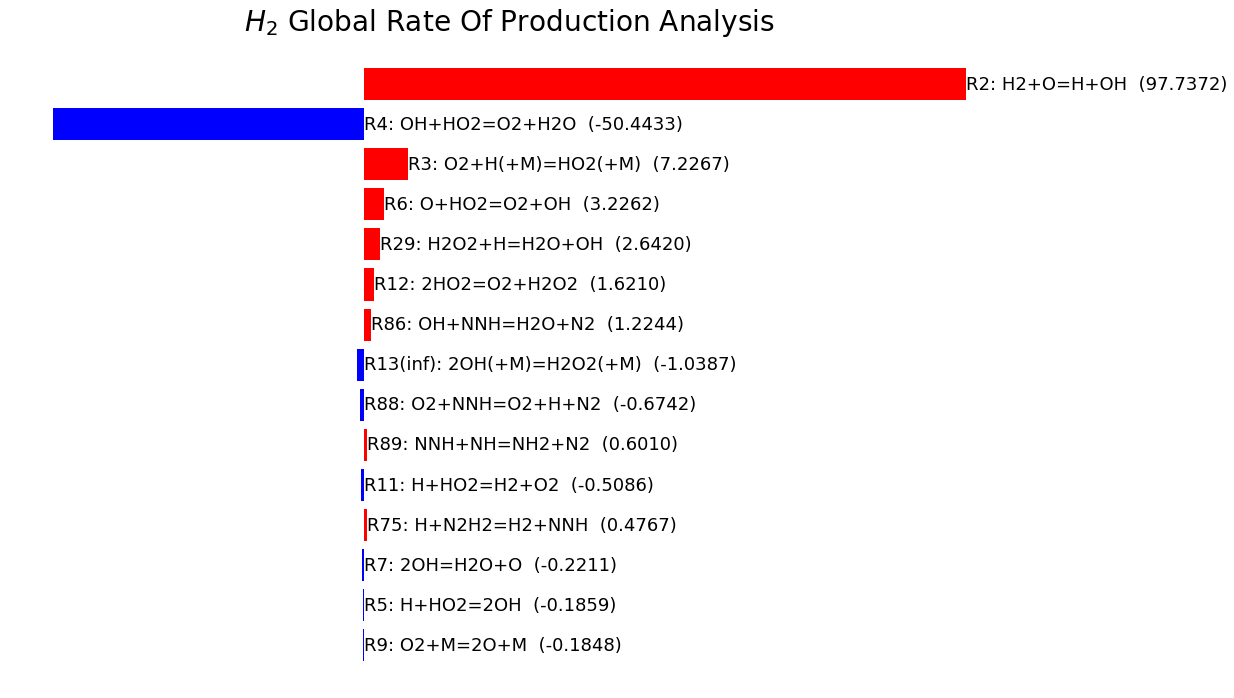

In [6]:
fig = plt.figure(figsize=(18, 12))
ax = plt.subplot()
ax.set_title("$NO$ Global Sensitivity Analysis\n ", fontsize=28)
bar = ax.barh(df.index, df['Sensitivity-Coeff'], color = (df['Sensitivity-Coeff'] >=0.).map({True:'red', False:'blue'}))
for idx, i in enumerate(bar):
    x = i.get_width() + 0.005
    y = i.get_y()+0.5*i.get_height()
    if(x<0):
        ax.text(0, y, 
            df['Reaction Name'][idx] + "  (" + str('{:6.4f}'.format(df["Sensitivity-Coeff"][idx])) + ")", 
            va='center', fontsize=18)
    else:
        ax.text(x, y, 
            df['Reaction Name'][idx] + "  (" + str('{:6.4f}'.format(df["Sensitivity-Coeff"][idx])) + ")", 
            va='center', fontsize=18)  

ax.set_yticks(np.arange(0, 10, 1))
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis("off")
ax.invert_yaxis()
plt.show()